# Name : Raja Haide Ali
# Class: BESE 11-A
# CMS ID: 346900


# CS-405 Deep Learning BS-CS/SE Fall-2023

# Lab 5 Starter Notebook

# Dataset
The given dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. **We will be using all of the 20,000 images**. The dataset in this assignment is going to be used on the following task:

## Given the pixels of an image, perform ethnicity classification for the image using a convolutional neural network.


The dataset for this lab is already cleaned and provided in a CSV format for you with images included as pixel values.

The 4 columns contain the following information:


* **[age]** is an integer from 0 to 116, indicating the age. You can convert it to float for regression predictions
* **[gender]** is either 0 (male) or 1 (female)
* **[race]** is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
*  The 4th column contains the pixels of the images flattened to a single dimension. Each of the original image is of size 48x48 and the flattened image vector consists of 48x48 = 2304 pixel values.

## You would be only using the Ethnicity Labels for your task and discard the Age and Gender labels for this lab.

In [1]:
!gdown https://drive.google.com/file/d/1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno
To: /content/DL_assignment1_dataset.csv
100% 199M/199M [00:01<00:00, 160MB/s]


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Lets use pandas to load our data
df = pandas.read_csv("/content/DL_assignment1_dataset.csv")
df

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


### For this assignment we will be using convolutional neural networks and the full data set.

### Please do not change the seed for the sampling of data points.

Let us take a look at an image. You will get an idea of how to process your data for your neural network.

The 4th column contains all the pixel values in a string for each image. Lets convert all the strings to arrays first.

In [4]:
def string_to_array(pixel_string):
    pixel_list = pixel_string.split()
    pixel_array = np.array([int(value) for value in pixel_list])
    return pixel_array

In [5]:
df['pixels'] = df['pixels'].apply(string_to_array)

In [6]:
df['pixels']

0        [129, 128, 128, 126, 127, 130, 133, 135, 139, ...
1        [164, 74, 111, 168, 169, 171, 175, 182, 184, 1...
2        [67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116,...
3        [193, 197, 198, 200, 199, 200, 202, 203, 204, ...
4        [202, 205, 209, 210, 209, 209, 210, 211, 212, ...
                               ...                        
23700    [127, 100, 94, 81, 77, 77, 74, 99, 102, 98, 12...
23701    [23, 28, 32, 35, 42, 47, 68, 85, 98, 103, 113,...
23702    [59, 50, 37, 40, 34, 19, 30, 101, 156, 170, 17...
23703    [45, 108, 120, 156, 206, 197, 140, 180, 191, 1...
23704    [156, 161, 160, 165, 170, 173, 166, 177, 183, ...
Name: pixels, Length: 23705, dtype: object

Our "pixels" column has been converted to arrays which we can now use as input features to our model

Lets show the first image of our dataset

Age: 1
Ethnicity: 2
Gender: 0


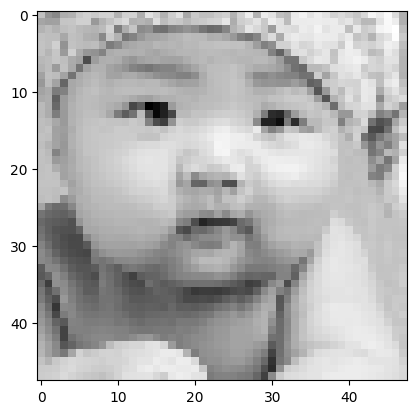

In [7]:
index = 31
first_image = df['pixels'][index]
image = first_image.reshape((48,48))
print("Age: "+str(df["age"][index])+"\nEthnicity: "+str(df["ethnicity"][index])+ "\nGender: "+str(df["gender"][index]))
plt.imshow(image,cmap="gray")

Uptill now, an initial processing has already been done using pandas in this starter code jupyter notebook. Hence you have a data frame ready for your assignment.

Please use the dataframe "df".

### You should consult the Lab 5 document provided to you for the tasks that are needed to be done for the successful completion of this lab. Grading rubricks are also mentioned in detail there.

# Note: In this lab you will be using all the 20,000 samples of this dataset.



# Part 1: Dataset Creation and Data Splitting (10 points):

In [8]:
# Write any further imports you need here
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [9]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
cols_to_drop = ["age", "gender"]
df.drop(cols_to_drop, axis=1,inplace = True)
df

,ethnicity,pixels
0,2,"[129, 128, 128, 126, 127, 130, 133, 135, 139, ..."
1,2,"[164, 74, 111, 168, 169, 171, 175, 182, 184, 1..."
2,2,"[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116,..."
3,2,"[193, 197, 198, 200, 199, 200, 202, 203, 204, ..."
4,2,"[202, 205, 209, 210, 209, 209, 210, 211, 212, ..."
...,...,...
23700,0,"[127, 100, 94, 81, 77, 77, 74, 99, 102, 98, 12..."
23701,1,"[23, 28, 32, 35, 42, 47, 68, 85, 98, 103, 113,..."
23702,2,"[59, 50, 37, 40, 34, 19, 30, 101, 156, 170, 17..."
23703,2,"[45, 108, 120, 156, 206, 197, 140, 180, 191, 1..."


In [11]:
len(df)

23705

In [12]:
X_train,X_temp,y_train,y_temp = train_test_split(df.iloc[:,1], df.iloc[:,0], train_size = 0.7, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(df.iloc[:,1], df.iloc[:,0], train_size = 0.5, random_state=32)
len(X_train), len(X_val), len(X_test)

(16593, 11852, 11853)

In [13]:
X_train = [torch.from_numpy(array).reshape(1, 48, 48).type(torch.float) for array in X_train.values]
X_val = [torch.from_numpy(array).reshape(1, 48, 48).type(torch.float) for array in X_val.values]
X_test = [torch.from_numpy(array).reshape(1, 48, 48).type(torch.float) for array in X_test.values]
y_train = torch.from_numpy(y_train.values).unsqueeze(dim=-1)
y_val = torch.from_numpy(y_val.values).unsqueeze(dim=-1)
y_test = torch.from_numpy(y_test.values).unsqueeze(dim=-1)

In [14]:
len(X_train), len(X_val), len(X_test)

(16593, 11852, 11853)

In [15]:
X_train = torch.stack(X_train)
X_val = torch.stack(X_val)
X_test = torch.stack(X_test)

In [16]:
# loading data into gpu
X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_val = X_val.to(device), y_val.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [17]:
X_train.shape

torch.Size([16593, 1, 48, 48])

In [18]:
X_train[0].shape

torch.Size([1, 48, 48])

In [19]:
# Create datasets for train, test, and validation sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_val, y_val)

# Define batch size
batch_size = 32

# Create DataLoader for train, test, and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Part 2: Building a Unified Neural Network (60 points)


### i): Convolutional Neural Network Architecture (30 points)

In [20]:
import torch.nn as nn

In [21]:
class EthnicityCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 5)  # Output size is 5 for the 5 ethnicity classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [22]:
# for reproducibility of the results
torch.manual_seed(32)
# creating an instance of the model
# loading model into gpu
model = EthnicityCNN().to(device)
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 0.2504, -0.1520, -0.0573],
                        [ 0.1905, -0.2580,  0.0529],
                        [ 0.0987, -0.3181,  0.0583]]],
              
              
                      [[[-0.1164,  0.2990,  0.0146],
                        [ 0.2521,  0.1503,  0.1286],
                        [-0.3161,  0.2880, -0.2725]]],
              
              
                      [[[ 0.1451,  0.1514, -0.0022],
                        [ 0.2872, -0.0882, -0.1967],
                        [ 0.1098, -0.0742, -0.2809]]],
              
              
                      [[[-0.2369, -0.2128,  0.0960],
                        [-0.2331,  0.1520,  0.2578],
                        [-0.1352,  0.1885,  0.0070]]],
              
              
                      [[[ 0.2125, -0.0420, -0.2082],
                        [ 0.2520, -0.2050,  0.0774],
                        [ 0.1900, -0.2413, -0.3030]]],
              
              
               

### (ii): Model Training (20 Points)
### (iii): Performance Monitoring (10 Points

In [23]:
import torch.optim as optim

In [24]:
# Define your loss function
criterion = nn.CrossEntropyLoss()

# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
def train_model(model, train_loader, criterion, optimizer):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs, labels.squeeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels.squeeze(1)).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    return train_loss, train_accuracy

In [26]:
def validate_model(model, val_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.squeeze(1))
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels.squeeze(1)).sum().item()

    val_loss = running_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    return val_loss, val_accuracy

In [27]:
# Training loop
num_epochs = 50
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer)
    val_loss, val_accuracy = validate_model(model, val_loader, criterion)

    train_losses.append(train_loss)
    train_accs.append(train_accuracy)
    val_losses.append(val_loss)
    val_accs.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% - "
          f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Epoch 1/50 - Train Loss: 1.4059, Train Accuracy: 60.59% - Validation Loss: 0.7610, Validation Accuracy: 73.41%
Epoch 2/50 - Train Loss: 0.7908, Train Accuracy: 72.49% - Validation Loss: 0.6300, Validation Accuracy: 79.02%
Epoch 3/50 - Train Loss: 0.7227, Train Accuracy: 74.74% - Validation Loss: 0.5731, Validation Accuracy: 79.96%
Epoch 4/50 - Train Loss: 0.6603, Train Accuracy: 77.13% - Validation Loss: 0.5396, Validation Accuracy: 81.39%
Epoch 5/50 - Train Loss: 0.6077, Train Accuracy: 79.00% - Validation Loss: 0.4772, Validation Accuracy: 83.58%
Epoch 6/50 - Train Loss: 0.5567, Train Accuracy: 80.77% - Validation Loss: 0.4382, Validation Accuracy: 84.88%
Epoch 7/50 - Train Loss: 0.5191, Train Accuracy: 82.32% - Validation Loss: 0.4120, Validation Accuracy: 86.68%
Epoch 8/50 - Train Loss: 0.4723, Train Accuracy: 83.90% - Validation Loss: 0.4449, Validation Accuracy: 85.72%
Epoch 9/50 - Train Loss: 0.4301, Train Accuracy: 85.13% - Validation Loss: 0.2952, Validation Accuracy: 90.62%
E

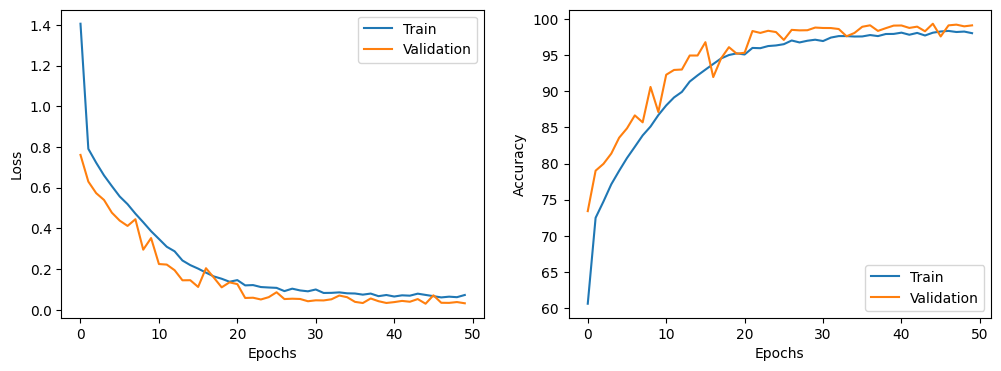

In [28]:
# Plot the training and validation curves (loss vs. epochs, accuracy vs. epochs)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train")
plt.plot(val_accs, label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Part 3: Evaluation (10 points)
### (i) Classification Evaluation

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [30]:
# set model to evaluation mode
# turns off the gradient tracking
model.eval()
test_loss = 0.0
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels.squeeze(1))
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.squeeze(1)).sum().item()
        y_true += labels.tolist()
        y_pred += predicted.tolist()

test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 1.0024
Test Accuracy: 85.37%


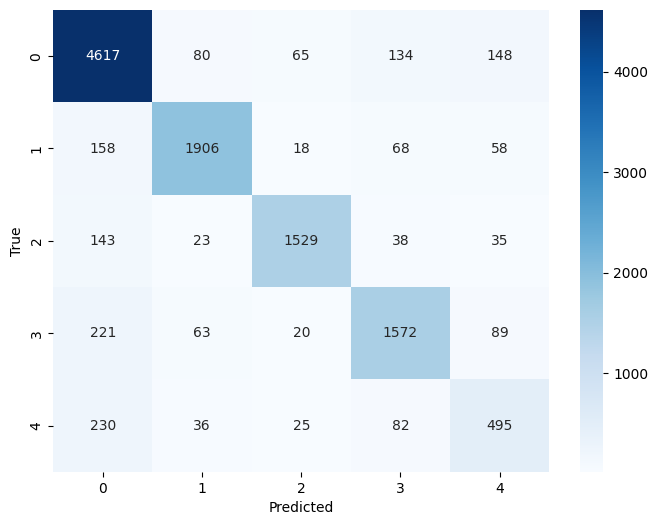

In [31]:
# Visualize the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()